In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\Peter\AppData\Local\Temp\ipykernel_23976\3741039909.py:3: DtypeWarning: Columns (631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\Peter\AppData\Local\Temp\ipykernel_23976\3741039909.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for age_group, group_data in data.groupby('age_group'):


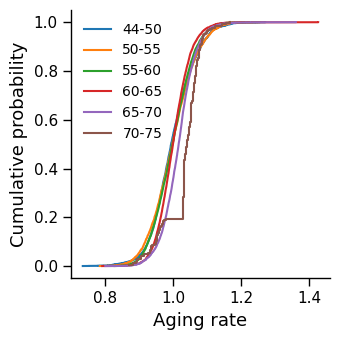

In [ ]:
# Load the dataset
file_path = '../data/4.300_all_prot+met+pop+diea+age.csv'
data = pd.read_csv(file_path)

# Create age groups with 5-year intervals
age_bins = np.arange(45, data['Age'].max() + 5, 5)
data['age_group'] = pd.cut(data['Age'], bins=age_bins, right=True, include_lowest=True)

# Initialize figure with specified dimensions
plt.figure(figsize=(3.5, 3.5))

# Plot Cumulative Distribution Function (CDF) for each age group
for age_group, group_data in data.groupby('age_group'):
    # Sort aging rates and calculate cumulative probabilities
    sorted_values = np.sort(group_data['aging_rate'])
    cumulative = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

    # Format legend label to show integer age ranges
    label = f'{int(age_group.left)}-{int(age_group.right)}'

    # Create step plot for CDF
    plt.step(sorted_values, cumulative, where='post', label=label)

# Remove top and right spines for cleaner appearance
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize axis line thickness
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Configure tick marks
ax.tick_params(axis='x', width=1, length=6, labelsize=11)
ax.tick_params(axis='y', width=1, length=6, labelsize=11)

# Add axis labels with specified font size
plt.xlabel('Aging rate', fontsize=13)
plt.ylabel('Cumulative probability', fontsize=13)

# Configure legend
plt.legend(fontsize=10, loc='upper left', frameon=False)

# Disable grid lines
plt.grid(False)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Display the plot
plt.show()